# Federated-ASDF database

## The Index SQLite3 database


In [1]:
import pandas as pd
import sqlite3

def get_netsta_pdf(dburl="/g/data/ha3/Passive/SHARED_DATA/Index/778837537aa72d892df7b0ba22320f537c1d8f6a.db"):
    """ Read sqlite table for network.station info into a pandas DataFrame
    """

    con = sqlite3.connect(dburl)
    
    # Read sqlite query results into a pandas DataFrame
    df = pd.read_sql_query("SELECT * from netsta", con)

    # Verify that result of SQL query is stored in the dataframe
    print("The size of the TABLE netsta=", df.size)
    
    print(df.head(5))

    con.close()
    
    return df

def get_netsta_rows(net,sta):
    filter1 = netsta_pdf["net"] == net 
    filter2 = netsta_pdf["sta"] == sta   #'ARMA' #'AXCOZ'

    a_pdf=netsta_pdf.loc[filter1 & filter2]

    print("Number of rows found in the TABLE netsta:", a_pdf.size)
    return a_pdf

In [2]:
netsta_pdf = get_netsta_pdf()

netcode ='AU' 
stacode ='ARMA' #'AXCOZ'

print("********* Query for the networ, station (%s,%s)"% (netcode,stacode))
df=get_netsta_rows(netcode,stacode)
print (df.head(5))

The size of the TABLE netsta= 15150
   ds_id net   sta       lon      lat
0      0  AU   CTA  146.2540 -20.0885
1      0  AU  FITZ  125.6430 -18.1030
2      0  AU  KAKA  132.4396 -12.7115
3      0  AU  RKGY  116.9773 -34.6094
4      1  AU  AS03  133.9197 -23.6744
********* Query for the networ, station (AU,ARMA)
Number of rows found 40
     ds_id net   sta       lon      lat
25       3  AU  ARMA  151.6280 -30.4198
99       4  AU  ARMA  151.6280 -30.4198
225      5  AU  ARMA  151.6293 -30.4183
482      6  AU  ARMA  151.6293 -30.4183
802      7  AU  ARMA  151.6293 -30.4183


## ASDF Archive Data (in HDF5 format)

In [3]:
import pyasdf

In [4]:
asdffile="/g/data/ha3/Passive/STRIPED_DATA/GA_PERM/2018-2019.h5"  # too large
# asdffile = "/g/data/ha3/GASeisDataArchive/DevSpace/2020.h5"

In [5]:
ds=pyasdf.ASDFDataSet(asdffile, mode="r")                        

In [6]:
# ds.validate()

In [7]:
print(ds.waveforms.list())

['AK.BESE', 'AK.FYU', 'AK.JIS', 'AK.MESA', 'AK.NIKH', 'AK.SPIA', 'AK.TNA', 'AK.UNV', 'AT.AKUT', 'AT.CRAG', 'AT.OHAK', 'AT.SDPT', 'AT.SMY', 'AU.ARMA', 'AU.ARPS', 'AU.AS01', 'AU.AS02', 'AU.AS03', 'AU.AS04', 'AU.AS05', 'AU.AS06', 'AU.AS07', 'AU.AS08', 'AU.AS09', 'AU.AS10', 'AU.AS11', 'AU.AS12', 'AU.AS13', 'AU.AS14', 'AU.AS15', 'AU.AS16', 'AU.AS17', 'AU.AS19', 'AU.AS31', 'AU.AXCOZ', 'AU.BBOO', 'AU.BLDU', 'AU.BN2S', 'AU.BOXOZ', 'AU.BRAT', 'AU.BW1H', 'AU.BW2S', 'AU.CARL', 'AU.CATI', 'AU.CMSA', 'AU.CN1H', 'AU.CN2S', 'AU.CNB', 'AU.COEN', 'AU.CORO', 'AU.CTA', 'AU.DLN', 'AU.DPH', 'AU.DRS', 'AU.EIDS', 'AU.FITZ', 'AU.FORT', 'AU.GC1S', 'AU.GC2F', 'AU.GD1S', 'AU.GEXS', 'AU.GHSS', 'AU.GIRL', 'AU.GLAD', 'AU.GVL', 'AU.HTT', 'AU.INKA', 'AU.KDU', 'AU.KELC', 'AU.KLBR', 'AU.KMBL', 'AU.KNRA', 'AU.LCRK', 'AU.LHI', 'AU.LM01', 'AU.LM02', 'AU.LM03', 'AU.LM04', 'AU.LM05', 'AU.MABG', 'AU.MANU', 'AU.MAW', 'AU.MCQ', 'AU.MEEK', 'AU.MGBR', 'AU.MGCD', 'AU.MILA', 'AU.MLBS', 'AU.MOO', 'AU.MORW', 'AU.MTKN', 'AU.MTN', 'AU

In [8]:
for net_station in ds.waveforms.list():
    net,sta =net_station.split(".")
    print("********** network and station *************",net,sta)
    get_netsta_rows(net,sta)
    print(ds.waveforms[net_station])

********** network and station ************* AK BESE
Number of rows found 10
Contents of the data set for station AK.BESE:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AK FYU
Number of rows found 10
Contents of the data set for station AK.FYU:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AK JIS
Number of rows found 10
Contents of the data set for station AK.JIS:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AK MESA
Number of rows found 10
Contents of the data set for station AK.MESA:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AK NIKH
Number of rows found 10
Contents of the data set for station AK.NIKH:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** net

Contents of the data set for station AU.CATI:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU CMSA
Number of rows found 50
Contents of the data set for station AU.CMSA:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU CN1H
Number of rows found 20
Contents of the data set for station AU.CN1H:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU CN2S
Number of rows found 20
Contents of the data set for station AU.CN2S:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU CNB
Number of rows found 45
Contents of the data set for station AU.CNB:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU COEN
Number of rows found 40
Contents 

Contents of the data set for station AU.MILA:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU MLBS
Number of rows found 20
Contents of the data set for station AU.MLBS:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU MOO
Number of rows found 40
Contents of the data set for station AU.MOO:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU MORW
Number of rows found 45
Contents of the data set for station AU.MORW:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU MTKN
Number of rows found 25
Contents of the data set for station AU.MTKN:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU MTN
Number of rows found 35
Contents of

Contents of the data set for station AU.SYDH:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU SYDS
Number of rows found 25
Contents of the data set for station AU.SYDS:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU TOO
Number of rows found 40
Contents of the data set for station AU.TOO:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU TV1H
Number of rows found 20
Contents of the data set for station AU.TV1H:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU TV2S
Number of rows found 20
Contents of the data set for station AU.TV2S:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* AU TW1H
Number of rows found 25
Contents

Contents of the data set for station CN.INK:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* CN YKAW1
Number of rows found 5
Contents of the data set for station CN.YKAW1:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* CU GTBY
Number of rows found 20
Contents of the data set for station CU.GTBY:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* G AIS
Number of rows found 20
Contents of the data set for station G.AIS:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* G CAN
Number of rows found 25
Contents of the data set for station G.CAN:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* G COYC
Number of rows found 5
Contents of the dat

Contents of the data set for station GE.SBV:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* GE SMRI
Number of rows found 30
Contents of the data set for station GE.SMRI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* GE SNAA
Number of rows found 30
Contents of the data set for station GE.SNAA:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* GE SOEI
Number of rows found 30
Contents of the data set for station GE.SOEI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* GE TNTI
Number of rows found 30
Contents of the data set for station GE.TNTI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* GE UGM
Number of rows found 30
Contents of 

Contents of the data set for station IA.KMPI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA KMSI
Number of rows found 5
Contents of the data set for station IA.KMSI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA KPJI
Number of rows found 5
Contents of the data set for station IA.KPJI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA KRAI
Number of rows found 5
Contents of the data set for station IA.KRAI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA KRK
Number of rows found 5
Contents of the data set for station IA.KRK:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA KSI
Number of rows found 5
Contents of the da

Contents of the data set for station IA.TRSI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA TTSI
Number of rows found 5
Contents of the data set for station IA.TTSI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA TWSI
Number of rows found 5
Contents of the data set for station IA.TWSI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA UBSI
Number of rows found 0
Contents of the data set for station IA.UBSI:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA UWJI
Number of rows found 5
Contents of the data set for station IA.UWJI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IA WBSI
Number of rows found 5
Contents of th

Contents of the data set for station II.SUR:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* II TAU
Number of rows found 35
Contents of the data set for station II.TAU:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* II UOSS
Number of rows found 20
Contents of the data set for station II.UOSS:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* II WRAB
Number of rows found 35
Contents of the data set for station II.WRAB:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM ATD
Number of rows found 20
Contents of the data set for station IM.ATD:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM BOSAB
Number of rows found 0
Contents of th

Contents of the data set for station IM.MK31:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM PLCAB
Number of rows found 0
Contents of the data set for station IM.PLCAB:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM PMG
Number of rows found 25
Contents of the data set for station IM.PMG:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM ROSC
Number of rows found 20
Contents of the data set for station IM.ROSC:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM TOA0
Number of rows found 25
Contents of the data set for station IM.TOA0:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IM TOA2
Number of rows found 5
Contents

Contents of the data set for station IU.FURI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IU GNI
Number of rows found 30
Contents of the data set for station IU.GNI:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IU GUMO
Number of rows found 20
Contents of the data set for station IU.GUMO:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IU HNR
Number of rows found 35
Contents of the data set for station IU.HNR:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IU INCN
Number of rows found 30
Contents of the data set for station IU.INCN:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* IU JOHN
Number of rows found 30
Contents of th

Contents of the data set for station JP.YOJ:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* KZ ABKAR
Number of rows found 30
Contents of the data set for station KZ.ABKAR:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* KZ MKAR
Number of rows found 30
Contents of the data set for station KZ.MKAR:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* MN WDD
Number of rows found 25
Contents of the data set for station MN.WDD:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* MS BTDF
Number of rows found 10
Contents of the data set for station MS.BTDF:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* MY KKM
Number of rows found 35
Contents of 

Contents of the data set for station S.AUMAZ:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* S AUMBR
Number of rows found 10
Contents of the data set for station S.AUMBR:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* S AUMHS
Number of rows found 15
Contents of the data set for station S.AUMHS:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* S AUMTC
Number of rows found 15
Contents of the data set for station S.AUMTC:
    - Has no StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* S AUMTS
Number of rows found 20
Contents of the data set for station S.AUMTS:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording
********** network and station ************* S AUNHS
Number of rows found 15
Conten

In [21]:
#sta1= ds.waveforms['AU.ARMA']  # has a station xml, has waveforms
# sta1= ds.waveforms['AU.AXCOZ'] # has NO stationXML, has waveforms
# sta1= ds.waveforms['S1.AUTKS']

sta1= ds.waveforms['AU.STKA']

In [22]:
type(sta1)

pyasdf.utils.WaveformAccessor

In [23]:
sta1.get_waveform_tags()

['raw_recording']

In [24]:
print (len(sta1.list()))
print(sta1.list()[0])
print(sta1.list()[-1])  # This will be StationXML IF it exists


3070
AU.STKA..BHE__2018-01-01T00:00:00__2018-01-01T23:59:59__raw_recording
StationXML


In [25]:
sta1.list()[-2:]

['AU.STKA..BHZ__2018-12-31T00:00:01__2018-12-31T23:59:59__raw_recording',
 'StationXML']

In [26]:
keystr=sta1.list()[0]
#astream = sta1['AU.ARMA..BHN__2020-01-06T08:42:51__2020-01-06T08:43:15__raw_recording']
astream = sta1[keystr]

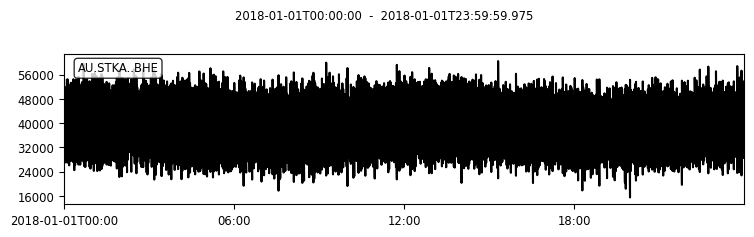

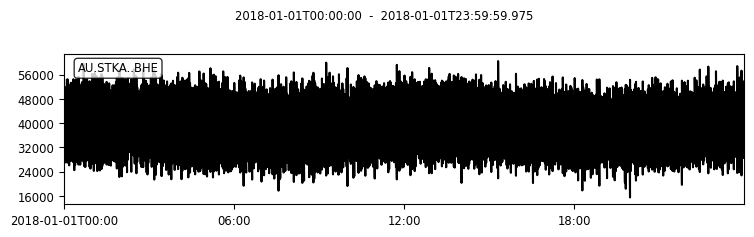

In [27]:
astream.plot()   # ?? Why always 2 identical figures?

In [28]:
print(astream)

1 Trace(s) in Stream:
AU.STKA..BHE | 2018-01-01T00:00:00.000000Z - 2018-01-01T23:59:59.975000Z | 40.0 Hz, 3456000 samples


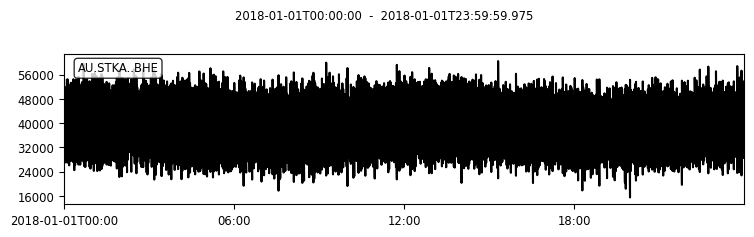

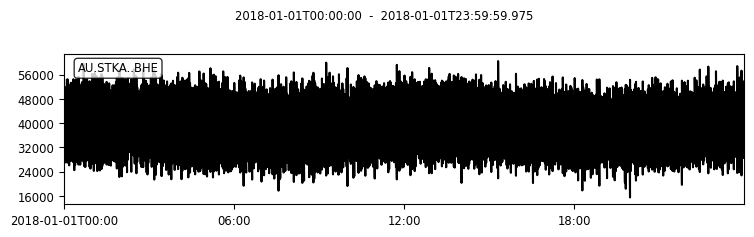

In [29]:
astream[0].plot()

In [30]:
sta1.StationXML   # if Has no StationXML, then error come out AttributeError: 'WaveformAccessor' object has no attribute 'StationXML'

Inventory created at 2019-05-04T14:17:58.000000Z
	Created by: None
		    None
	Sending institution: SeisComP3 (NA)
	Contains:
		Networks (1):
			AU
		Stations (1):
			AU.STKA (AU-STKA)
		Channels (2):
			AU.STKA..BHZ (2x)

In [31]:
sta1.StationXML.write("a_station.xml", format="STATIONXML")

In [32]:
!ls

'ASDF and Federated-ASDF.ipynb'   au_arma.xml			  __init__.py
 a_station.xml			  get_waveforms_from_fedasdf.py   jup.log
